In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch

print(f'PyTorch version= {torch.__version__}')
print(f'CUDA available= {torch.cuda.is_available()}')

PyTorch version= 1.9.1
CUDA available= True


In [2]:
# A helper function to display properties of the Python objects
def describe(x):
    print(f"Type= {x.type()}")
    print(f"Shape/size= {x.shape}")
    print(f"Values= {x}")

# Random tensor, has dummy values from the computer memory - not initialized
describe(torch.Tensor(2, 3))

Type= torch.FloatTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [3]:
# Initialization
x = torch.ones(2, 3)
describe(x)

# Initialization
x.fill_(5)
describe(x)

Type= torch.FloatTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type= torch.FloatTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [4]:
# Initialize from a numpy array
np_array = np.random.rand(2, 3)
describe(torch.from_numpy(np_array))

Type= torch.DoubleTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[0.1355, 0.5889, 0.3732],
        [0.7477, 0.5798, 0.5491]], dtype=torch.float64)


In [5]:
# Initialization using arange
x = torch.arange(6)
describe(x)

Type= torch.LongTensor
Shape/size= torch.Size([6])
Values= tensor([0, 1, 2, 3, 4, 5])


In [6]:
# Convert shape (1,6) to shape (2,3)
x = x.view(2, 3)
describe(x)

Type= torch.LongTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[0, 1, 2],
        [3, 4, 5]])


In [7]:
# Sum values on dimension 0, i.e. vertically on columns
describe(torch.sum(x, dim=0))

Type= torch.LongTensor
Shape/size= torch.Size([3])
Values= tensor([3, 5, 7])


In [8]:
# Sum values on dimension 1, i.e. horizontally on rows
describe(torch.sum(x, dim=1))

Type= torch.LongTensor
Shape/size= torch.Size([2])
Values= tensor([ 3, 12])


In [9]:
# Transpose of the matrix
describe(torch.transpose(x, 0, 1))

Type= torch.LongTensor
Shape/size= torch.Size([3, 2])
Values= tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [10]:
# Slicing works similarly to numpy
describe(x)
describe(x[:1, :2])

Type= torch.LongTensor
Shape/size= torch.Size([2, 3])
Values= tensor([[0, 1, 2],
        [3, 4, 5]])
Type= torch.LongTensor
Shape/size= torch.Size([1, 2])
Values= tensor([[0, 1]])


In [11]:
# Create a 2 by 2 matrix, all ones
x = torch.ones(2, 2, requires_grad=True)
describe(x)

print(x.grad is None)

Type= torch.FloatTensor
Shape/size= torch.Size([2, 2])
Values= tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [12]:
# Define a linear computation
y = (x+2) * (x+5) + 3
describe(y)

print(x.grad is None)

Type= torch.FloatTensor
Shape/size= torch.Size([2, 2])
Values= tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [13]:
# Take mean of y, gradient is none
z = y.mean()
describe(z)

z.backward()

print(x.grad is None)

Type= torch.FloatTensor
Shape/size= torch.Size([])
Values= 21.0
False


In [14]:
import torch.nn as nn

class Perceptron(nn.Module):
    """ A perceptron is one linear layer """
    def __init__(self, input_dim):
        """
        Args:
            input_dim (int): size of the input features
        """
        super(Perceptron, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1)

    def forward(self, x_in):
        """ The forward pass of the perceptron
        Args:
            x_in (torch.Tensor): an input data tensor
            x_in.shape should be (batch, num_features)
        Returns:
            the resulting tensor. tensor.shape should be (batch,).
        """
        return torch.sigmoid(self.fc1(x_in)).squeeze()

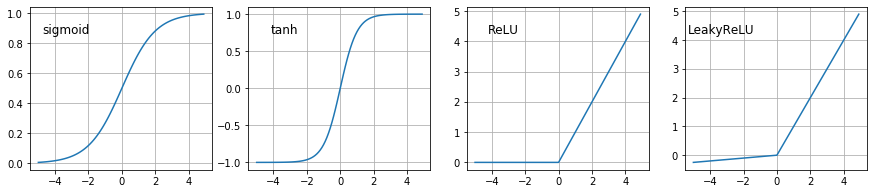

In [15]:
x = torch.arange(-5, 5, .1)
y1 = torch.sigmoid(x)
y2 = torch.tanh(x)
y3 = torch.relu(x)
y4 = nn.functional.leaky_relu(x, negative_slope=0.05)

plt.figure(figsize=(15, 3))

ax=plt.subplot(1, 4, 1); ax.grid(); plt.title("sigmoid", x=0.2, y=0.8)
ax.plot(x.numpy(), y1.numpy())

ax=plt.subplot(1, 4, 2); ax.grid(); plt.title("tanh", x=0.2, y=0.8)
ax.plot(x.numpy(), y2.numpy())

ax=plt.subplot(1, 4, 3); ax.grid(); plt.title("ReLU", x=0.2, y=0.8)
ax.plot(x.numpy(), y3.numpy())

ax=plt.subplot(1, 4, 4); ax.grid(); plt.title("LeakyReLU", x=0.2, y=0.8)
ax.plot(x.numpy(), y4.numpy())

plt.show()

In [16]:
# Check the softmax output 
softmax = nn.Softmax(dim=1)
x_input = torch.randn(1, 3)
y_output = softmax(x_input)

print(x_input)
print(y_output)
print(torch.sum(y_output, dim=1))

tensor([[-0.6755,  0.2045,  1.3895]])
tensor([[0.0885, 0.2134, 0.6980]])
tensor([1.])


In [17]:
# Demonstrate MSE loss
mse_loss = nn.MSELoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.randn(3, 5)

loss = mse_loss(outputs, targets)

print(loss)

tensor(1.7741, grad_fn=<MseLossBackward>)


In [18]:
# Demonstrate CCE loss
ce_loss = nn.CrossEntropyLoss()
outputs = torch.randn(3, 5, requires_grad=True)
targets = torch.tensor([1, 0, 3], dtype=torch.int64)

loss = ce_loss(outputs, targets)

print(loss)

tensor(1.6278, grad_fn=<NllLossBackward>)


In [19]:
# Demonstrate BCE loss
bce_loss = nn.BCELoss()
sigmoid = nn.Sigmoid()
probabilities = sigmoid(torch.randn(4, 1, requires_grad=True))
targets = torch.tensor([1, 0, 1, 0], dtype=torch.float32).view(4, 1)

loss = bce_loss(probabilities, targets)

print(probabilities)
print(loss)

tensor([[0.2412],
        [0.5953],
        [0.4558],
        [0.4130]], grad_fn=<SigmoidBackward>)
tensor(0.9113, grad_fn=<BinaryCrossEntropyBackward>)


In [20]:
# Demonstrate the Adam optimizer
import torch.optim as optim

input_dim = 2
learning_rate = 0.001  # this must be found by a hyper-parameter search

perceptron = Perceptron(input_dim=input_dim)  # defined above
bce_loss = nn.BCELoss()  # Binary cross entropy loss
optimizer = optim.Adam(params=perceptron.parameters(), lr=learning_rate)

print(optimizer)

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)


In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

df = pd.read_csv('stack_overflow_data.csv')
df = df[pd.notnull(df['tags'])]
print(f"Number of words= {df['post'].apply(lambda x: len(x.split(' '))).sum()}")

plCats = np.unique(df['tags'])
print(f"K categories={len(plCats):d} {plCats}")

X_tfidf = TfidfVectorizer(dtype=np.float32, max_features=1000).fit_transform(df.post).todense()
print(f"N data points= {X_tfidf.shape[0]}, M features= {X_tfidf.shape[1]}")

Number of words= 10286120
K categories=20 ['.net' 'android' 'angularjs' 'asp.net' 'c' 'c#' 'c++' 'css' 'html' 'ios'
 'iphone' 'java' 'javascript' 'jquery' 'mysql' 'objective-c' 'php'
 'python' 'ruby-on-rails' 'sql']
N data points= 40000, M features= 1000


In [22]:
def kfold_eval_docs(_clf, _Xdocs, _ydocs):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score

    # Need indexable data structure
    acc = []
    kf = StratifiedKFold(n_splits=10, shuffle=False, random_state=None)
    for train_index, test_index in kf.split(_Xdocs, _ydocs):
        _clf.fit(_Xdocs[train_index], _ydocs[train_index])
        y_pred = _clf.predict(_Xdocs[test_index])
        acc += [accuracy_score(_ydocs[test_index], y_pred)]
    return np.array(acc)

In [23]:
%%time

from sklearn.svm import LinearSVC

acc = kfold_eval_docs(LinearSVC(class_weight='balanced'), X_tfidf, df.tags)

print(f"Linear SVM 10-fold CV accuracy= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

Linear SVM 10-fold CV accuracy= 0.79 ±0.005
Wall time: 23.3 s


In [24]:
import torch.nn as nn
import torch.nn.functional as F

class MyNetwork(nn.Module):
    """ A PyTorch neural network model """
    def __init__(self):
        super(MyNetwork, self).__init__()
        self.fc1 = nn.Linear(1000, 100)  # A simple input layer, size M x Hsize
        self.fc2 = nn.Linear( 100, 100)  # A simple hidden layer, size Hsize x Hsize
        self.fc3 = nn.Linear( 100,  20)  # A simple output layer, size Hsize x K

    def forward(self, x, apply_softmax=False):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        if apply_softmax:
            x = F.softmax(x, dim=1)
        return x

In [25]:
# Instantiate the neural network
Net1 = MyNetwork()
print(Net1)

# Set the learning rate - this part is magic of course
eta = 0.05

MyNetwork(
  (fc1): Linear(in_features=1000, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (fc3): Linear(in_features=100, out_features=20, bias=True)
)


In [26]:
# Create a Stochastic Gradient Descent optimizer
optimizer = optim.SGD(Net1.parameters(), lr=eta, momentum=0.9)

# Create the loss function
loss_func = nn.CrossEntropyLoss()

In [27]:
from sklearn.model_selection import train_test_split

# Class labels (integers) are int64 for PyTorch
y_tfidf = np.array(df.tags.astype('category').cat.codes, dtype='int64')

# Use validation to measure generalization performance
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y_tfidf, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [28]:
# Convert to tensors
X_train, y_train = torch.tensor(X_train), torch.tensor(y_train)
X_test, y_test = torch.tensor(X_test), torch.tensor(y_test)
X_val, y_val = torch.tensor(X_val), torch.tensor(y_val)

In [29]:
def predict(_x):
    net_out = Net1.forward(_x, apply_softmax=True)
    p_values, indices = net_out.max(dim=1)
    return indices

In [30]:
import sys

epochs=100
minibatch_size=1000

# The main training loop
for i in range(epochs):
    indices = np.arange(X_train.shape[0])
    for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]
        # step 1.
        optimizer.zero_grad()
        # step 2.
        net_out = Net1.forward(X_train[batch_idx])
        # step 3.
        loss = loss_func(net_out, y_train[batch_idx])
        # step 4.
        loss.backward()
        # step 5.
        optimizer.step()

    y_pred = predict(X_train)
    y_val_pred = predict(X_val)
    
    train_acc = (torch.sum(y_train == y_pred).float() / X_train.shape[0])
    val_acc = (torch.sum(y_val == y_val_pred).float() / X_val.shape[0])
    
    sys.stderr.write(f"\r{i+1}/{epochs} | Cost: {loss:.2f} | Train/Valid Acc.: {train_acc*100:.2f}%/{val_acc*100:.2f}%")
    sys.stderr.flush()

100/100 | Cost: 0.45 | Train/Valid Acc.: 85.67%/76.57%

In [31]:
y_pred = predict(X_test)
test_acc = (torch.sum(y_test == y_pred).float() / X_test.shape[0])

print(f"Feedforward NN testing accuracy= {test_acc:.2f}")

Feedforward NN testing accuracy= 0.77


In [40]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class CustomMLP(nn.Module):
    """ A PyTorch neural network model """
    def __init__(self, n_hidden=30, epochs=100, eta=0.05, minibatch_size=50):
        super(CustomMLP, self).__init__()
        self.n_hidden = n_hidden  # hidden layer size
        self.epochs = epochs  # number of learning iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
        self.fc1, self.fc2, self.fc3 = None, None, None
        
        self.dropout = nn.Dropout( 0.5 )

    def _forward(self, X, apply_softmax=False):
        assert self.fc1 != None
        X = F.relu(self.fc1(X))

        X = F.relu( self.dropout( self.fc2( X ) ) )
        X = F.relu(self.fc3(X))
        
        if apply_softmax:
            X = F.softmax(X, dim=1)
        return X

    def _reset(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                 m.reset_parameters()

    def predict(self, X):
        assert self.fc1 != None
        net_out = self._forward(X, apply_softmax=True)
        p_values, indices = net_out.max(dim=1)
        return indices

    def fit(self, X_train, y_train):
        self._reset()  # Reset the neural network weights
        n_output= np.unique(y_train).shape[0]  # number of class labels
        n_features= X_train.shape[1]

        self.fc1 = nn.Linear(n_features, self.n_hidden)  # A simple input layer
        self.fc2 = nn.Linear(self.n_hidden, self.n_hidden)  # A simple hidden layer
        self.fc3 = nn.Linear(self.n_hidden, n_output)  # A simple output layer
        
        optimizer = optim.SGD(self.parameters(), lr=self.eta, momentum=0.9)
        loss_func = nn.CrossEntropyLoss()

        for _ in range(self.epochs):
            indices = np.arange(X_train.shape[0])
            
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                optimizer.zero_grad()
                
                net_out = self._forward(X_train[batch_idx])
                
                loss = loss_func(net_out, y_train[batch_idx])
                loss.backward()
                optimizer.step()

In [41]:
%%time

# PyTorch Feedforward NN 10-fold CV accuracy= 0.78 ±0.006, Wall time: 2min 14s
# With dropout, PyTorch Feedforward NN 10-fold CV accuracy= 0.45 ±0.005, Wall time: 2min 20s
# Shifted dropout layer to inbetween layers 2 and 3, PyTorch Feedforward NN 10-fold CV accuracy= 0.78 ±0.006, Wall time: 2min 17s

clf = CustomMLP(100, 100, 0.05, 1000)

acc = kfold_eval_docs(clf, torch.tensor(X_tfidf), torch.tensor(y_tfidf))

print(f"PyTorch Feedforward NN 10-fold CV accuracy= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")

PyTorch Feedforward NN 10-fold CV accuracy= 0.77 ±0.005
Wall time: 2min 30s


In [34]:
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, n_features, n_hidden, n_output, eta=0.0005):
        super(RNN, self).__init__()

        self.n_features = n_features
        self.n_hidden = n_hidden

        self.i2h = nn.Linear(n_features + n_hidden, n_hidden)
        self.i2o = nn.Linear(n_features + n_hidden, n_output)
        self.softmax = nn.LogSoftmax(dim=1)

        self.eta = eta  # learning rate
        
        # loss function, since the last layer is nn.LogSoftmax
        self.criterion = nn.NLLLoss()


    def forward(self, x, hidden):
        combined = torch.cat((x, hidden), dim=1)
        hidden = self.i2h(combined)
        output = self.i2o(combined)
        output = self.softmax(output)
        return output, hidden

    def init_hidden(self):
        return torch.zeros(1, self.n_hidden)

    def train_signal(self, sxx, y):
        hidden = self.init_hidden()
        self.zero_grad()

        T = sxx.shape[0]
        for i in range(T):  # i.e., for the duration of the signal
            output, hidden = self.forward(sxx[i].reshape(1,self.n_features), hidden)

        loss = self.criterion(output, y)
        loss.backward()
        
        for p in self.parameters():
            p.data.add_(-self.eta, p.grad.data)

        return output, loss.item()